Imports


In [110]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [90]:
uploaded = files.upload()

df = pd.read_csv((list(uploaded.keys())[0] ))

Saving 0day _In the Wild_ - All.csv to 0day _In the Wild_ - All (11).csv


In [124]:
df.head()


,CVE,Vendor,Product,Type,Description,Date Discovered,Date Patched,Advisory,Analysis URL,Root Cause Analysis,Reported By
0,311,3,39,3,10,Unknown,198,207,Unknown,Unknown,NaN
1,310,3,39,3,115,Unknown,197,207,Unknown,Unknown,NaN
2,309,3,28,3,156,Unknown,196,239,Unknown,Unknown,NaN
3,308,12,5,3,114,2024-01-11,195,40,Unknown,Unknown,NaN
4,307,12,5,3,55,2023-12-19,194,39,Unknown,Unknown,Clément Lecigne and Vlad Stolyarov of Google's...


Top 10 most Zero-Day according to Companies.

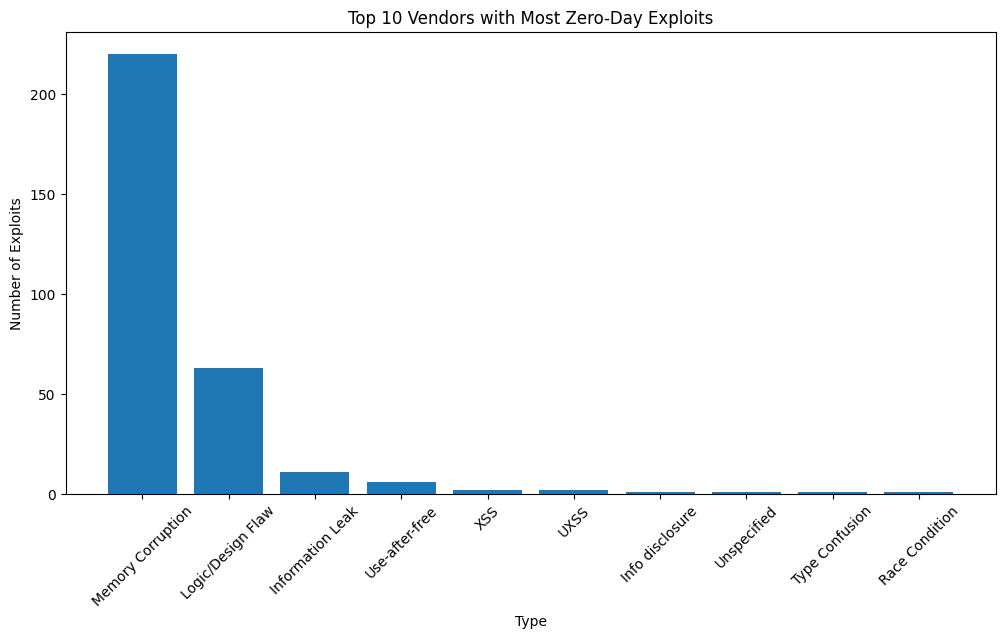

In [92]:

values = df['Type'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(values[:10].index, values[:10])
plt.xlabel('Type')
plt.ylabel('Number of Exploits')
plt.xticks(rotation=45)
plt.title('Top 10 Vendors with Most Zero-Day Exploits')
plt.show()

The types of Zero-Day Exploitation.

In [122]:
df['Type'].value_counts()


0      3
1      3
2      3
3      3
4      3
      ..
307    3
308    3
309    3
310    2
311    2
Name: Type, Length: 312, dtype: int64

Classification based on the Exploitation type.


In [121]:
df['Date Discovered'].fillna('Unknown', inplace=True)
df['Root Cause Analysis'].fillna('Unknown', inplace=True)
df['Analysis URL'].fillna('Unknown', inplace=True)
df['Type'].fillna('Unknown', inplace=True)


0      3
1      3
2      3
3      3
4      3
      ..
307    3
308    3
309    3
310    2
311    2
Name: Type, Length: 312, dtype: int64

In [95]:
le = LabelEncoder()
for column in ['CVE', 'Type', 'Vendor', 'Product', 'Description', 'Date Patched', 'Advisory']:
    df[column] = le.fit_transform(df[column])


In [120]:
X = df[['CVE', 'Vendor', 'Product', 'Description', 'Date Discovered',
       'Date Patched', 'Advisory', 'Analysis URL', 'Root Cause Analysis']]
y = df['Type']

for column in ['Date Discovered','Analysis URL', 'Root Cause Analysis']:
  X[column] = le.fit_transform(X[column])

scaler = StandardScaler()
X = scaler.fit_transform(X)


<ipython-input-120-a3a2fa4a3ae7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-120-a3a2fa4a3ae7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-120-a3a2fa4a3ae7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

0      3
1      3
2      3
3      3
4      3
      ..
307    3
308    3
309    3
310    2
311    2
Name: Type, Length: 312, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
df['Type']

0      3
1      3
2      3
3      3
4      3
      ..
307    3
308    3
309    3
310    2
311    2
Name: Type, Length: 312, dtype: int64

Building the Model

In [98]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(len(y.unique()), activation='softmax')
])

Compiling the Model.

In [99]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


Training the model

In [143]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/20
7/7 [==============================] - 0s 24ms/step - loss: 0.3588 - accuracy: 0.8342 - val_loss: 1.5250 - val_accuracy: 0.6400
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 0.4185 - accuracy: 0.8543 - val_loss: 1.5363 - val_accuracy: 0.7000
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3684 - accuracy: 0.8492 - val_loss: 1.5529 - val_accuracy: 0.6400
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3362 - accuracy: 0.8643 - val_loss: 1.6017 - val_accuracy: 0.6800
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3578 - accuracy: 0.8543 - val_loss: 1.6358 - val_accuracy: 0.7000
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.3394 - accuracy: 0.8744 - val_loss: 1.6339 - val_accuracy: 0.6600
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3210 - accuracy: 0.8442 - val_loss: 1.6318 - val_accuracy: 0.6400
Epoch 8/20
7/7 [===========

Making predictions

In [1]:
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)

predicted_classes

NameError: name 'model' is not defined

In [145]:
accuracy = accuracy_score(y_test, predicted_classes)
print(f'Accuracy: {accuracy}')

# Classification Report
class_report = classification_report(y_test, predicted_classes)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.746031746031746
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.67      0.57      0.62        14
           3       0.79      0.88      0.83        42
           5       0.00      0.00      0.00         1
           9       0.67      1.00      0.80         2
          10       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.35      0.41      0.37        63
weighted avg       0.69      0.75      0.72        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
